[./lecture-07.ipynb](./lecture-07.ipynb)


# Rates for multiple reactions

When we have multiple reactions, e.g.

1.  $A \rightarrow 2B$
2.  $B \rightarrow C$

we have a scenario where a species maybe consumed and/or generated by multiple reactions.

Each reaction will have its own reaction rate. We denote the rate of reaction $i$ as $r_i$.

In this example, we might have $r_1 = k_1 C_A$, and $r_2 = k_2 C_B$.

Then we have from reaction 1 that the rate of production of B is $r_{1,B} = 2 r_1$ and the rate of consumption in reaction two is $r_{2,B} = -r_2$.

The net rate of production of species B is the sum of these two species specific rates.

$ r_B = r_{1,B} + r_{2,B} $

$ r_B = 2 r_1 - r_2 $

Note that B is produced by reaction 1, and consumed by reaction 2. So we expect the concentration of B to initially rise since it is being produced, but eventually to fall since it will be consumed by reaction 2, and these reactions are irreversible.This is an example of a reactions in series.

This is the expression we would use in a species mole balance. For example, in a constant volume batch reactor we would have:

$ \frac{dN_B}{dt} = V r_B $

$ \frac{dN_A}{dt} = V r_A $

In this example you also need another mole balance on species A because $r_1$ depends on the concentration of A.

-   Critical points
    -   We need rate laws for each reaction
    -   You derive the species rates using stoichiometry for each reaction
    -   You add all the species rates together to get the net rate of reaction for the species

Let us work out this example completely. Let us consider a constant volume batch reactor. We have the following data:

<table border="2" cellspacing="0" cellpadding="6" rules="groups" frame="hsides">


<colgroup>
<col  class="org-left" />

<col  class="org-left" />
</colgroup>
<tbody>
<tr>
<td class="org-left">k1</td>
<td class="org-left">0.09 1/min</td>
</tr>


<tr>
<td class="org-left">k2</td>
<td class="org-left">0.2 1/min</td>
</tr>


<tr>
<td class="org-left">C<sub>A0</sub></td>
<td class="org-left">2.5 M</td>
</tr>
</tbody>
</table>

We want to plot the concentration of A and B as a function of time up to thirty minutes. Find the time where the concentration of B is a maximum.



$ \frac{dN_B}{dt} = V r_B $  $\frac{dC_B}{dt} = r_B$

$ \frac{dN_A}{dt} = V r_A $

$r_A  = -r_1 = -k_1 C_A$

$r_B = 2 r_1 - r_2 = 2 k_1 C_A - k2 C_B$

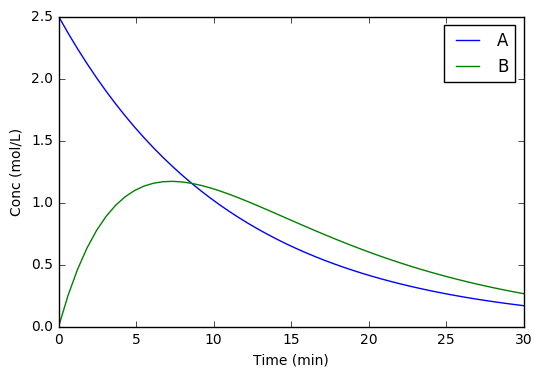

In [5]:
import numpy as np
from scipy.integrate import odeint

k1 = 0.09 # 1/min  assuming both are first order
k2 = 0.2  # 1/min  r2 = k2 * Cb

CA0 = 2.5 # mol/L

def batch(C, t):
    Ca, Cb = C
    r1 = k1 * Ca
    r2 = k2 * Cb

    ra = -r1
    r1b = 2 * r1
    r2b = -r2
    rb = r1b + r2b

    dCadt = ra
    dCbdt = rb

    return [dCadt, dCbdt]

init = [CA0, 0.0] # initial conditions
tspan = np.linspace(0, 30) # min
sol = odeint(batch, init, tspan)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(tspan, sol)
plt.xlabel('Time (min)')
plt.ylabel('Conc (mol/L)')
plt.legend(['A','B'])

In [13]:
i = np.argmax(Cb)
print(max(Cb))
print(i)
print(Cb[i], tspan[i])

1.17062406414
12
1.17062406414 7.34693877551


In [14]:
?np.argmax

This is a demonstration that the decay of C_A is actually exponential, because this log plot is linear.

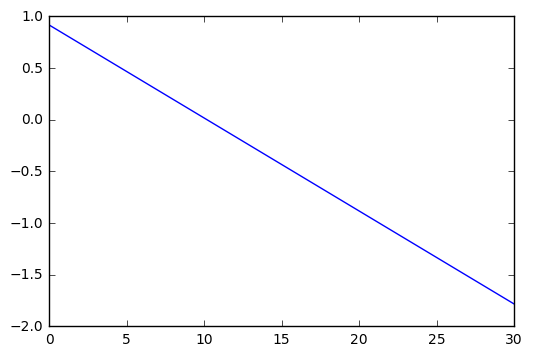

In [4]:
Ca, Cb = sol.T
plt.plot(tspan, np.log(Ca))

You can see here that A continuously disappears. A is only consumed in the first reaction.

Initially, B increases as it is produced by the first reaction. However, it begins to be consumed by reaction two, and eventually is completely consumed. If B was the desired product, you could maximize the yield by stopping the reaction after a short time. This is typical for a series reaction.


# Mole balances with multiple reactions

-   There is nothing particularly new in mole balances with multiple reactions

-   We still write species based mole balances

For the reaction $aA + bB \rightarrow cC + dD$ which occurs at a rate of $r$ we use:

$r = \frac{r_A}{-a} = \frac{r_B}{-b} = \frac{r_C}{c} = \frac{r_D}{d}$

or in other words:

$r_A = -a r$

$r_B = -b r$

$r_C = c r$

$r_D = d r$

-   We use the net rate law for each species, e.g. $r_A = r_{1,A} + r_{2,A}$.

-   This typically leads to coupled equations
    -   For CSTRs these are often coupled nonlinear algebra equations
    -   For PFRs these are often coupled differential equations


## Multiple reactions in a CSTR

Mesitylene (trimethyl benzene) can be hydrogenated to form m-xylene, which can be further hydrogenated to toluene

-   The reactions we consider are:

\begin{align}
M + H_2 \rightarrow X + CH_4 \\
X + H_2 \rightarrow T + CH_4
\end{align}

-   The reaction is carried out isothermally at 1500 $^\circ$ R at 35 atm.
-   The feed is 2/3 hydrogen and 1/3 mesitylene
-   The volumetric feed rate is 476 cubic feet per hour and the reactor volume is 238 cubic feet
-   The rate laws are

\begin{align}
r_1 = k_1 C_M C_H^{0.5} \\
r_2 = k_2 C_X C_H^{0.5}
\end{align}

-   The rate constants are:

\begin{align}
k_1 = 55.20 \textrm{(ft$^3$/lb mol)$^{0.5}$/h} \\
k_2 = 30.20 \textrm{(ft$^3$/lb mol)$^{0.5}$/h} \\
\end{align}

Find the exit concentrations of each species.

Here is the code we need to setup and solve this problem. We have to setup 5 steady state mole balances which will all be equal to zero when we have the right exit concentrations. We do not have to worry about mole number changes here, since no reaction has a mole number change in it.

Here is the given information



In [17]:
vo = 476.0    # ft^3 / hr
V = 238.0     # ft^3
Po = 35.0     # atm
T = 1500.0    # Rankine
R = 0.73      # in appropriate units
CTo = Po / R / T  # total concentration

# initial concentrations
Cmo = CTo / 3.0        # mesitylene
Cho = CTo * 2.0 / 3.0  # hydrogen
Cxo = 0.0 # xylene
Cmeo = 0.0 # methane
Ctolo = 0.0 # toluene

print('Cmo = {:1.3f} mol/ft^3 and Cho = {:1.3f} mol / ft^3'.format(Cmo, Cho))

k1 = 55.20  # (ft^3/lbmol)^0.5/h
k2 = 30.20  # (ft^3/lbmol)^0.5/h

Cmo = 0.011 mol/ft^3 and Cho = 0.021 mol / ft^3


And the objective function we have to solve. This is just the 5 mole balances. We define the two reaction rates, and then use stoichiometry to define the net rates for each species.



In [22]:
def objective(C):
    CM, CH, CX, CMe, CT = C

    # rate laws
    r1 = k1 * CM * CH**0.5 
    r2 = k2 * CX * CH**0.5

    # net rates using stoichiometry
    rM = -r1    # mesitylene
    rH = -r1 - r2 # hydrogen
    rX = r1 - r2 # xylene
    rMe = r1 + r2 # methane
    rT = r2 # toluene

    # mole balances 0 = F_i0 - F_i + r_i V
    return [Cmo * vo - CM * vo + rM * V,  # mesitylene
            Cho * vo - CH * vo + rH * V,  # hydrogen
            Cxo * vo - CX * vo + rX * V,   # xylene
            Cmeo * vo - CMe * vo + rMe * V, # methane
            Ctolo * vo - CT * vo + rT * V] # toluene

print(objective([0.005, 0.01, 0.001, 0.001, 0.01]))

[-3.8772627092846275, -1.9044854185692541, 5.374040000000001, 6.81156, -4.04124]


Now we need to solve it, and for that we need an initial guess. We have a 5 dimensional space to guess in! For now, we just make a guess. We guess these small numbers based on the initial concentrations of reactants, and guessing a conversion of reactants. You can try many values and find out that it does not seem to matter much what you choose, you always get the same answers, which suggests (but does not prove) that there are not many other solutions.



In [33]:
initGuesses = [0.005, 0.01, 0.005, 0.002, 0.01]
from scipy.optimize import fsolve

exitC = fsolve(objective, initGuesses)
print(objective(exitC))
species = ['M', 'H', 'X', 'Me', 'T']
for s,C in zip(species, exitC):
    print('{0:^3s}   {1:1.5f} lbmol/ft^3'.format(s,C))
    


[3.6681768733615172e-13, 8.7219120814552298e-13, 1.3922196728799463e-13, -8.7219120814552298e-13, -5.0581761001922132e-13]
 M    0.00294 lbmol/ft^3
 H    0.00905 lbmol/ft^3
 X    0.00317 lbmol/ft^3
Me    0.01226 lbmol/ft^3
 T    0.00455 lbmol/ft^3



# Multiple reactions in a PFR

Now we solve the same problem in a PFR. This will lead to a set of coupled ODEs.



In [35]:
Fto = CTo * vo

# initial molar flows
Fmo = Fto / 3.0
Fho = Fto * 2.0 / 3.0
Fxo = 0.0
Fmeo = 0.0
Ftolo = 0.0

The ode function is defined like this:



In [36]:
def dFdV(F, t):
    'PFR mole balances'
    Ft = F.sum()

    v = vo * Ft / Fto # we do not take chances and guess the vol flow might change.
    C = F / v
    CM, CH, CX, CMe, CT = C

    # rate laws
    k1 = 55.20
    k2 = 30.20
    r1m = -k1 * CM * CH**0.5
    r2t = k2 * CX * CH**0.5

    # net rates
    rM = r1m
    rH = r1m - r2t
    rX = -r1m - r2t
    rMe = -r1m + r2t
    rT = r2t

    dFMdV = rM
    dFHdV = rH
    dFXdV = rX
    dFMedV = rMe
    dFTdV = rT

    return [dFMdV, dFHdV, dFXdV, dFMedV, dFTdV]

To solve this we need initial conditions (compare this to the need for the initial guess for the CSTR).



In [37]:
Finit = [Fmo, Fho, Fxo, Fmeo, Ftolo]
Vspan = np.linspace(0.0, 238.0)

sol = odeint(dFdV, Finit, Vspan)

Ft = sol.sum(axis=1)  # sum each row
v = vo * Ft / Fto

FM = sol[:, 0]
FH = sol[:, 1]
FX = sol[:, 2]
FMe = sol[:, 3]
FT = sol[:, 4]

# see if the molar flow changes.
print(Ft / Fto)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


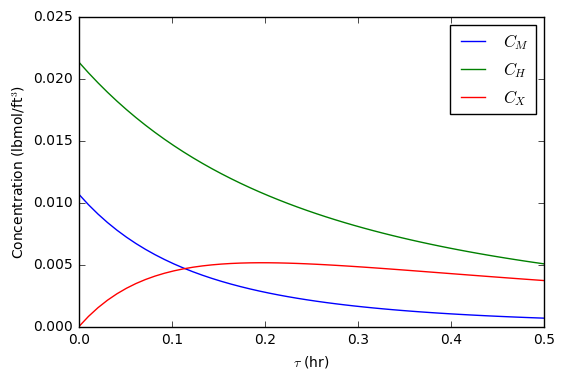

In [1]:
tau = Vspan / vo

plt.plot(tau, FM / v, label='$C_M$')
plt.plot(tau, FH / v, label='$C_H$')
plt.plot(tau, FX / v, label='$C_X$')

plt.legend(loc='best')
plt.xlabel('$\\tau$ (hr)')
plt.ylabel('Concentration (lbmol/ft$^3$)')

You can see that the basic approach is the same as for a single reaction, the code is just *a lot* longer.

In this example it was not necessary to compute the total molar flow. Inspection shows that it is a constant. Hence, the volumetric flow is also constant since there is no pressure drop and no temperature change.

Finally, you can see there is an optimal spacetime (or for fixed volumetric flow an optimal volume) that maximizes the production of xylene. That is because this is again a series reaction for xylene where it can be subsequently reacted to form toluene. In contrast, for hydrogen, it is consumed in parallel reactions.

